In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importacion de los datos

In [4]:
import pandas as pd

In [5]:
path = './Default.csv'
data = pd.read_csv(path)

In [8]:
print(data.head())

   Unnamed: 0 default student      balance        income
0           1      No      No   729.526495  44361.625074
1           2      No     Yes   817.180407  12106.134700
2           3      No      No  1073.549164  31767.138947
3           4      No      No   529.250605  35704.493935
4           5      No      No   785.655883  38463.495879


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB
None


PREPROCESAMIENTO

In [71]:
category_columns = ['default', 'student']

In [33]:
final_data = pd.get_dummies(data, category_columns, drop_first=True)
print(final_data)

      Unnamed: 0      balance        income  default_Yes  student_Yes
0              1   729.526495  44361.625074        False        False
1              2   817.180407  12106.134700        False         True
2              3  1073.549164  31767.138947        False        False
3              4   529.250605  35704.493935        False        False
4              5   785.655883  38463.495879        False        False
...          ...          ...           ...          ...          ...
9995        9996   711.555020  52992.378914        False        False
9996        9997   757.962918  19660.721768        False        False
9997        9998   845.411989  58636.156984        False        False
9998        9999  1569.009053  36669.112365        False        False
9999       10000   200.922183  16862.952321        False         True

[10000 rows x 5 columns]


In [ ]:
# PARA CONVERTIR LOS VALORES FALSE A 0 Y LOS TRUE A 1
final_data['default_Yes'] = final_data['default_Yes'].astype(int)
final_data['student_Yes'] = final_data['student_Yes'].astype(int)

print(final_data)

      Unnamed: 0      balance        income  default_Yes  student_Yes
0              1   729.526495  44361.625074            0            0
1              2   817.180407  12106.134700            0            1
2              3  1073.549164  31767.138947            0            0
3              4   529.250605  35704.493935            0            0
4              5   785.655883  38463.495879            0            0
...          ...          ...           ...          ...          ...
9995        9996   711.555020  52992.378914            0            0
9996        9997   757.962918  19660.721768            0            0
9997        9998   845.411989  58636.156984            0            0
9998        9999  1569.009053  36669.112365            0            0
9999       10000   200.922183  16862.952321            0            1

[10000 rows x 5 columns]


Separar las variables predictoras (x) de la variable predicha (y)

In [36]:
data_features = ['balance', 'income', 'student_Yes']

x = final_data[data_features]
x

,balance,income,student_Yes
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0
...,...,...,...
9995,711.555020,52992.378914,0
9996,757.962918,19660.721768,0
9997,845.411989,58636.156984,0
9998,1569.009053,36669.112365,0


In [37]:
y = final_data.default_Yes
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default_Yes, Length: 10000, dtype: int32

SEPARAR DATOS DE ENTRENAMIENTO Y DATOS DE VALIDACION

In [40]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 558.9 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.0 MB 558.9 kB/s eta 0:00:19
   -- ------------------------------------- 0.8/11.0 MB 578.0 kB/s eta 0:00:18
   --- ------------------------------------ 1.0/11.0 MB 636.8 kB/s eta 0:00:16
   --- ------------------------------------ 1.0/11.0 MB 636.8 kB/s eta 0:00:16
   --- ------------------------------------ 1.0/11.0 MB 636.8 kB/s eta 0:00:16
   ---- ----------------------------------- 1.3/11.0 MB 599.2 kB/s eta 0:00:17
   ---- ----------------------------------- 1.3/11.0 MB 599.2 kB/s eta 0:00:17
   ---- --


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [48]:
print('Entrenamiento')
print(x_train)
print('\nValidacion')
print(x_test)

Entrenamiento
          balance        income  student_Yes
1723   318.877271  50069.024327            0
7982  1592.549635  18024.281720            1
1307   744.732637  44965.046415            0
5650   698.157982  19582.816158            1
3679   859.007910  43101.873807            0
...           ...           ...          ...
4506  1004.116828  52822.404383            0
7759   765.818664  33216.353198            0
6868  1991.135514  30809.674567            0
6333  2066.695603  10470.636000            1
1511   956.533337  53702.541562            0

[7000 rows x 3 columns]

Validacion
          balance        income  student_Yes
5338   286.660875  34499.532631            0
937    684.294841  37011.183276            0
4476   268.961483  40733.467983            0
612   1097.600039  52286.431823            0
8103   600.602172  18630.379131            1
...           ...           ...          ...
7529    91.415284  46468.787983            0
3660     0.000000  41523.752477            0
7796

Modelamiento

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [50]:
clasificador = LogisticRegression()
clasificador.fit(x_train, y_train)

LogisticRegression()

In [51]:
y_pred = clasificador.predict(x_test)

EVALUACION

In [55]:
print(y_pred)

[0 0 0 ... 0 0 0]


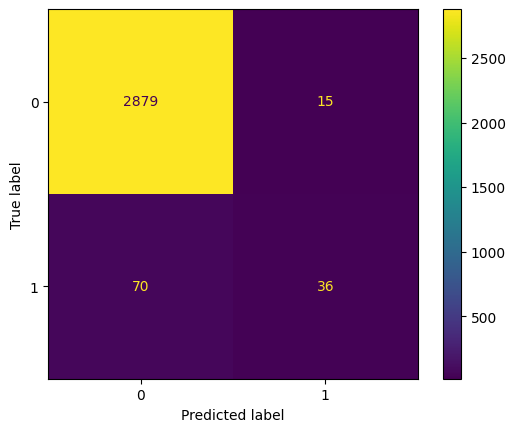

In [58]:
cm = confusion_matrix(y_test, y_pred) 
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [64]:
print(f'El acurracy es: {accuracy_score(y_pred, y_test)}')

El acurracy es: 0.9716666666666667
